In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
data = pd.read_pickle("./clean_data.pickle")

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             45222 non-null  int64
 1   workclass       45222 non-null  int32
 2   final_weight    45222 non-null  int64
 3   education       45222 non-null  int32
 4   education_num   45222 non-null  int64
 5   marital_status  45222 non-null  int32
 6   occupation      45222 non-null  int32
 7   relationship    45222 non-null  int64
 8   race            45222 non-null  int64
 9   sex             45222 non-null  int32
 10  capital_gain    45222 non-null  int64
 11  capital_loss    45222 non-null  int64
 12  hours_per_week  45222 non-null  int64
 13  country         45222 non-null  int32
 14  salary          45222 non-null  int32
dtypes: int32(7), int64(8)
memory usage: 4.3 MB


In [26]:
data.head()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,salary
0,39,0,77516,3,13,0,1,3,0,1,1,0,40,0,0
1,50,2,83311,3,13,1,1,2,0,1,0,0,13,0,0
2,38,1,215646,2,9,0,2,3,0,1,0,0,40,0,0
3,53,1,234721,1,7,1,2,2,3,1,0,0,40,0,0
4,28,1,338409,3,13,1,1,1,3,0,0,0,40,1,0


In [27]:
x = data.iloc[:, 0:14] 
y= data["salary"]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [29]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [30]:
y_pred = nb.predict(X_test)

In [31]:
# Evalaucion del modelo
print('Train Accuracy : %.5f' % nb.score(X_train, y_train))
print('Test Accuracy : %.5f' % nb.score(X_test, y_test))
print("Precisión del modelo:", accuracy_score(y_test, y_pred))

Train Accuracy : 0.77912
Test Accuracy : 0.77578
Precisión del modelo: 0.7757794648780129


Accuracy: 0.78
              precision    recall  f1-score   support

           0       0.78      0.97      0.87     10193
           1       0.67      0.20      0.30      3374

    accuracy                           0.78     13567
   macro avg       0.73      0.58      0.58     13567
weighted avg       0.76      0.78      0.73     13567

[[9866  327]
 [2715  659]]


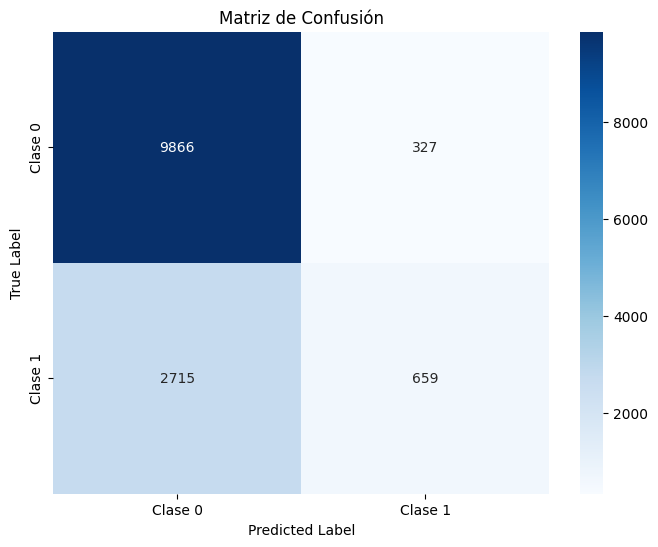

In [32]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Visualizar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Clase 0', 'Clase 1'], 
            yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Matriz de Confusión')
plt.show()